# 911 Calls Project

For this  project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Import numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

** Import visualization libraries **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

** Read in the csv file as a dataframe called df **

In [4]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1



## Exploratory Data Analysis (EDA)


** the top 5 zipcodes for 911 calls **

In [7]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [8]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**  unique title codes **

In [9]:
df['title'].nunique()

110

# Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. 

now i will create a new column called "Reason" that contains this string value.** 

In [10]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0])

In [11]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot: xlabel='Reason', ylabel='count'>

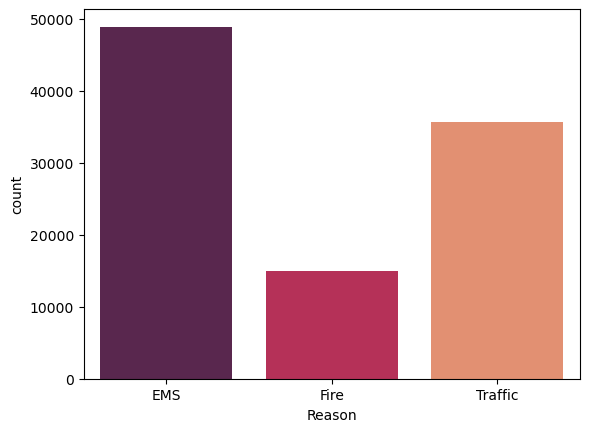

In [13]:
sns.countplot(x='Reason',data=df,palette='rocket')

** let's focus on time information. type of the timeStamp colum is string. **

In [14]:
type(df['timeStamp'].loc[0])

str

In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [16]:
type(df['timeStamp'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

**  now I grab specific attributes like day and an hour from a Datetime object by calling them.

In [17]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Month']=df['timeStamp'].apply(lambda time:time.month)

**  the Day of Week is an integer 0-6. now I map the actual string names to the day of the week: **

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
df['Day of Week']=df['Day of Week'].map(dmap)

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thu,12


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

<AxesSubplot: xlabel='Day of Week', ylabel='count'>

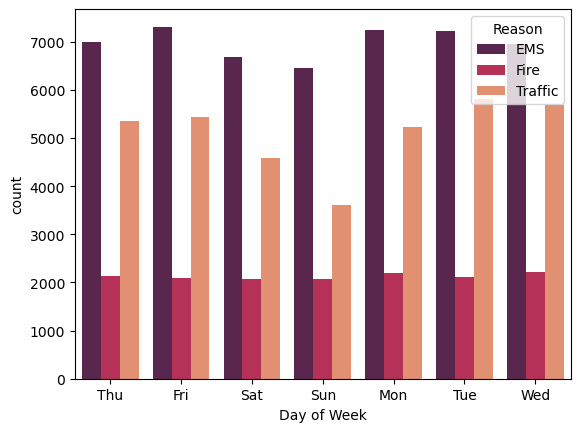

In [21]:
sns.countplot(data=df, x='Day of Week',hue=df['Reason'],palette='rocket')

**Now do the same for Month:**

<AxesSubplot: xlabel='Month', ylabel='count'>

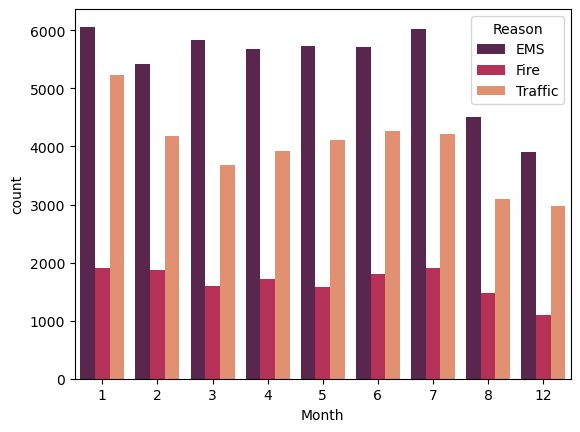

In [22]:
sns.countplot(data=df, x='Month',hue=df['Reason'],palette='rocket')



** It is missing some months! 9,10, and 11 are not there. let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months. **

In [23]:
byMonth=df.groupby(by='Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot: xlabel='Month'>

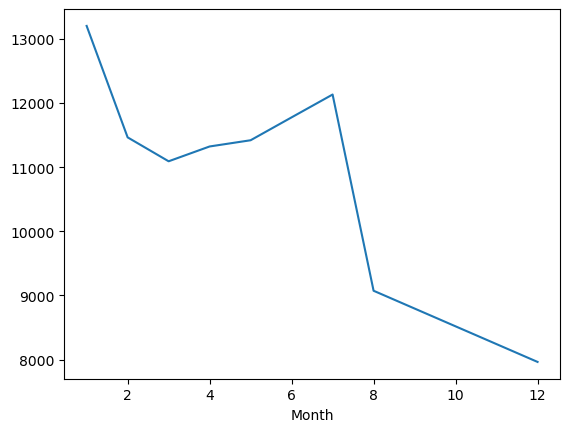

In [24]:
byMonth['twp'].plot()

** Now see if I can use seaborn's lmplot() to create a linear fit on the number of calls per month.

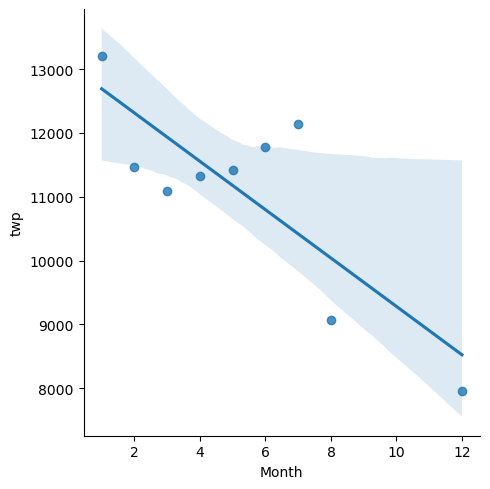

In [25]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())


**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [26]:
#df['Date']=df['timeStamp'].dt.date
#or
df['Date']=df['timeStamp'].apply(lambda time:time.date())

In [27]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [28]:
df2=df[df['Reason']=='Fire'].groupby(by='Date').count()

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

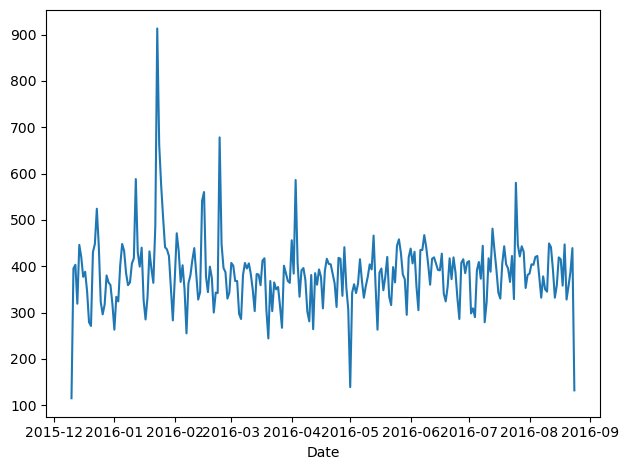

In [29]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreate this plot representing a Reason (EMS) for the 911 call**

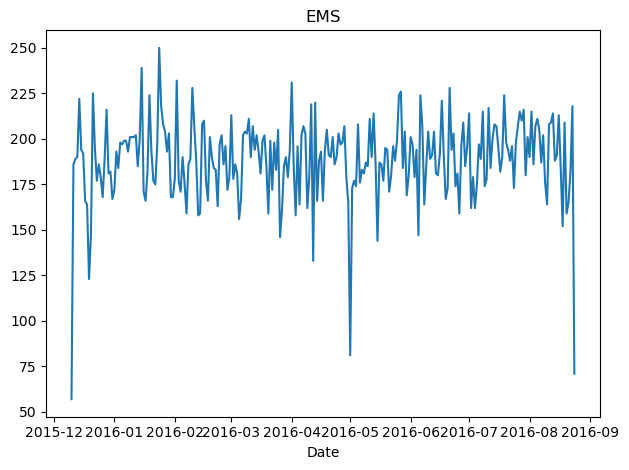

In [30]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [31]:
dayHour=df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot: xlabel='Hour', ylabel='Day of Week'>

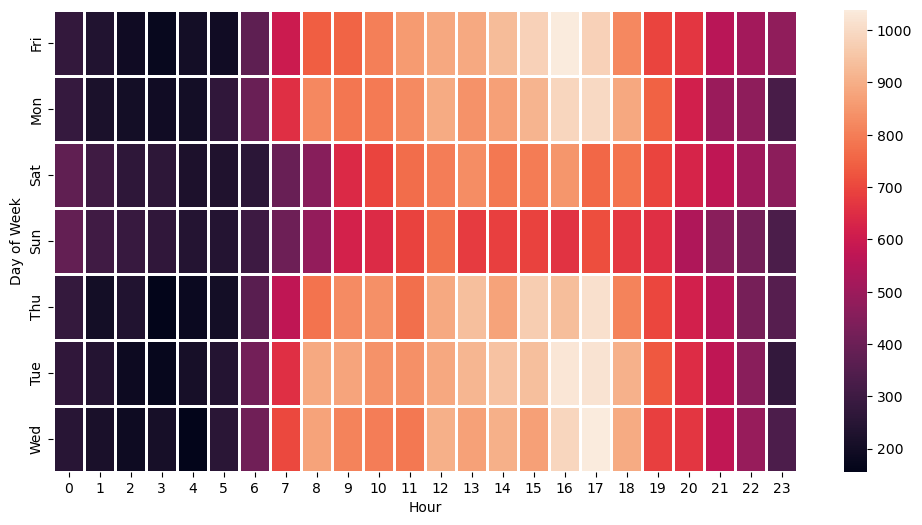

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='rocket',linecolor='white',linewidths=1)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [33]:
dayMonth=df.groupby(['Day of Week','Month']).count().unstack()['Reason']
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot: xlabel='Month', ylabel='Day of Week'>

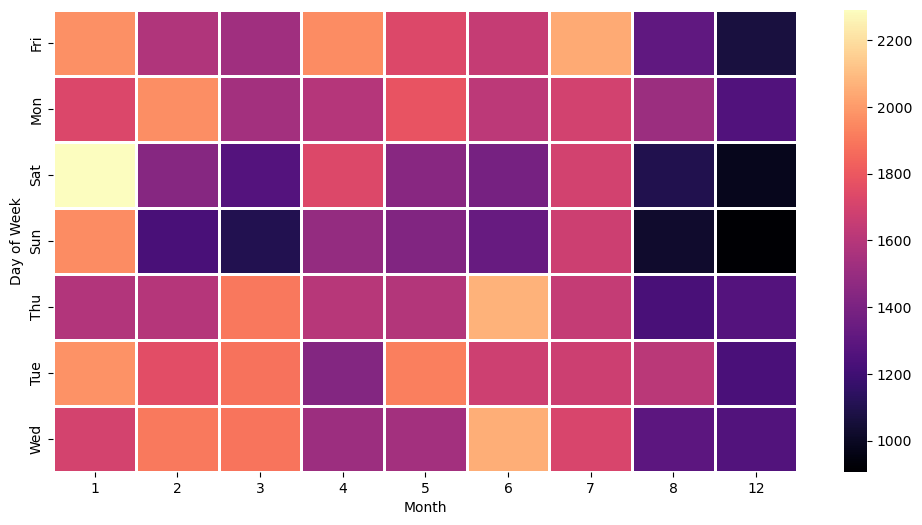

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='magma',linecolor='white',linewidths=1)

<Figure size 1200x600 with 0 Axes>

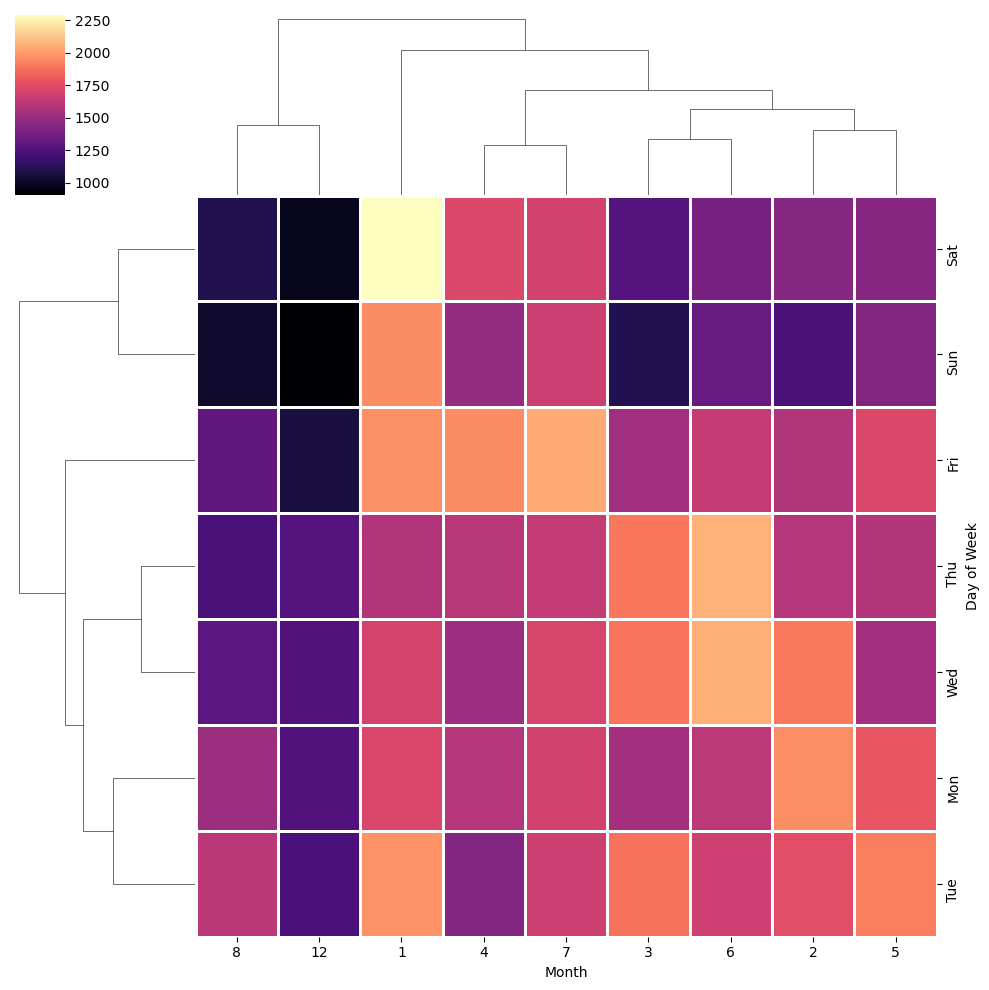

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='magma',linecolor='white',linewidths=1)

# Scatter plots on maps

** now lets plot out the location of calls for fire Reason in month 8 using plotly **

In [36]:
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [50]:
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df[df['Reason']=='Fire'][df['Month']==8]['lng'],
        lat = df[df['Reason']=='Fire'][df['Month']==8]['lat'],
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            colorbar_title="calls for Fire Reason in August"
        )))

fig.update_layout(
        title = 'location of calls for Fire Reason in August',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

C:\Users\sepeh\AppData\Local\Temp\ipykernel_21732\2966246758.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\sepeh\AppData\Local\Temp\ipykernel_21732\2966246758.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

